# Task 1 Findings
## Minimum and Maximum Distance
Min = 2cm

Max = 430cm 
    
Hallucinate = 1195cm

## Data collection

A grid was layed out of horizontal stripes. For the first 150cm the stripes were in intervals of 15cm. After that, the intervals were 25cm until 200cm. Then 50cm until 300cm. Finally, 8 values were taken of different intervals to find the maximum length which it measures. Up until 90cm, we used a small cuboid measuring 2cm. From 90-150cm, we used an object with a length of 7.5cm. For the values after, we used one which measured 9cm. For the final 8 values, we used a box which measured 25cm to ensure it was read.

## Data Processing


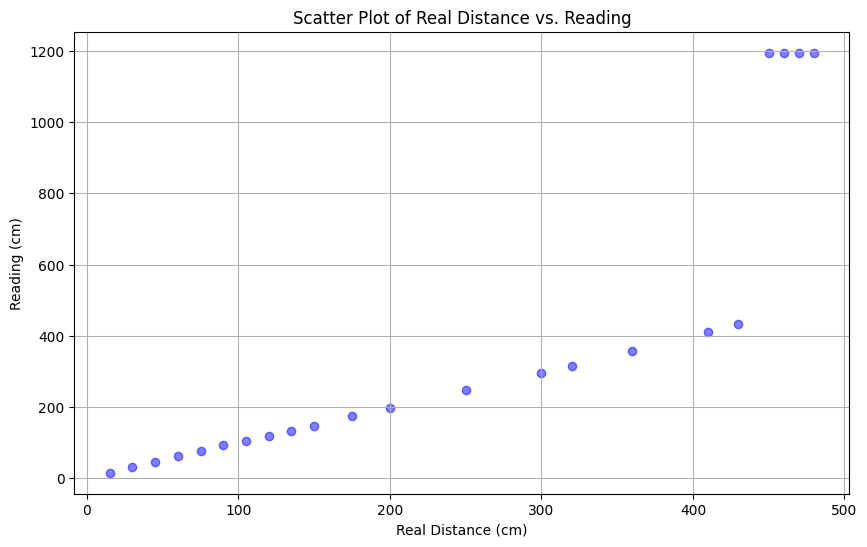

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')

plt.figure(figsize=(10, 6))
plt.scatter(data['real_distance'], data['reading'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Real Distance vs. Reading')
plt.xlabel('Real Distance (cm)')
plt.ylabel('Reading (cm)')
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


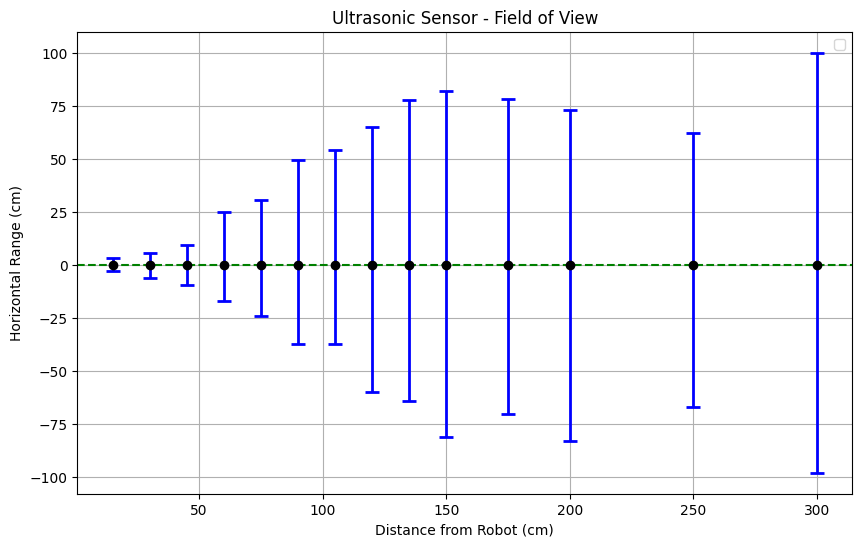

In [26]:
real_distance = data['real_distance'].iloc[0:14]
max_left = data['max_left_reading'].iloc[0:14]
max_right = data['max_right_reading'].iloc[0:14]

plt.figure(figsize=(10, 6))

plt.errorbar(real_distance, [0]*len(real_distance), yerr=[max_left, max_right], 
             fmt='o', color='black', ecolor='blue', capsize=5, elinewidth=2, capthick=2)

plt.axhline(y=0, color='green', linestyle='--')

plt.title('Ultrasonic Sensor - Field of View')
plt.xlabel('Distance from Robot (cm)')
plt.ylabel('Horizontal Range (cm)')
plt.grid(True)

plt.legend()

plt.show()


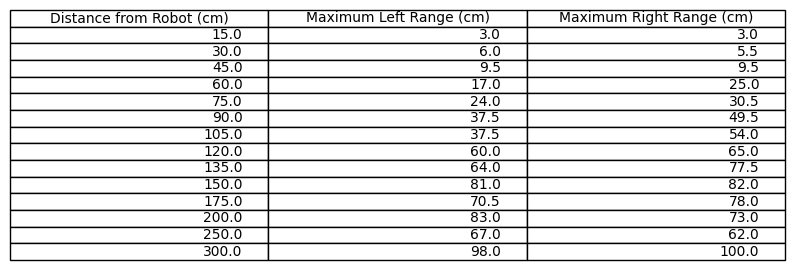

In [27]:
plot_data = pd.DataFrame({
    'Distance from Robot (cm)': real_distance,
    'Maximum Left Range (cm)': max_left,
    'Maximum Right Range (cm)': max_right,
})

fig, ax = plt.subplots(figsize=(10, 2))  
ax.axis('tight')
ax.axis('off')
ax.table(cellText=plot_data.values,
         colLabels=plot_data.columns,
         loc='center')

plt.show()


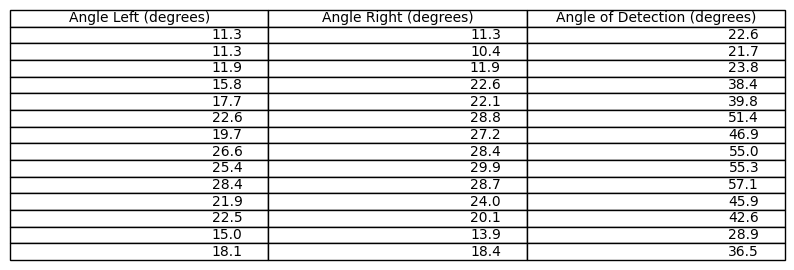

In [28]:
from math import atan, degrees

angles_right = []
angles_left = []
angles = []

for i in range(0, 14):
    angle_right = round(degrees(atan(max_right[i] / real_distance[i])), 1)
    angle_left = round(degrees(atan(max_left[i] / real_distance[i])), 1)
    angles_left.append(angle_left)
    angles_right.append(angle_right)
    angles.append(round(angle_left + angle_right, 1))
    

plot_data = pd.DataFrame({
    'Angle Left (degrees)': angles_left,
    'Angle Right (degrees)': angles_right,
    'Angle of Detection (degrees)': angles,
})

fig, ax = plt.subplots(figsize=(10, 2))  
ax.axis('tight')
ax.axis('off')
ax.table(cellText=plot_data.values,
         colLabels=plot_data.columns,
         loc='center')

plt.show()
